This is a jupyter notebook to get all the data from my shapefiles, group together the objects with the same label and then save the data as png images of a size 10000 x 10000 pix (which correspond to the size of my bounding boxes).

In [1]:
import geopandas as gpd
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.collections import PatchCollection
import fiona
from descartes.patch import PolygonPatch
import pandas as pd
import os
import numpy as np
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap

# Load the box module from shapely to create box objects
from shapely.geometry import box



## ROADS

In [2]:
# load all the shapely files related to ROADS
fp_road = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/A_RESEAU_ROUTIER/ROUTE.shp"
fp_nmrd = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/A_RESEAU_ROUTIER/ROUTE_NOMMEE.shp"
fp_prrd= "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/A_RESEAU_ROUTIER/ROUTE_PRIMAIRE.shp"
fp_scrd ="D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/A_RESEAU_ROUTIER/ROUTE_SECONDAIRE.shp"
# Read file using gpd.read_file()
data_road = gpd.read_file(fp_road)
data_nmrd =  gpd.read_file(fp_nmrd)
data_prrd = gpd.read_file(fp_prrd)
data_scrd = gpd.read_file(fp_scrd)
frames = [data_road, data_nmrd, data_prrd, data_scrd]
# make a single table with all the roads, not just a signle type
all_roads=  pd.concat([data_road, data_nmrd, data_prrd, data_scrd],ignore_index=True ) 

In [6]:
all_roads.head() # small demo of the roads 

,ID,PREC_PLANI,PREC_ALTI,NATURE,NUMERO,NOM_VOIE_G,NOM_VOIE_D,IMPORTANCE,CL_ADMIN,GESTION,...,CODEPOST_D,TYP_ADRES,BORNEDEB_G,BORNEDEB_D,BORNEFIN_G,BORNEFIN_D,ETAT,Z_INI,Z_FIN,geometry
0,TRONROUT0000000053091419,1.5,1.0,Route Ã 2 chaussÃ©es,NC,AV JEAN JAURES,AV JEAN JAURES,3,Autre,NC,...,21000,Classique,0,0,0,0,NR,238.6,238.6,"LINESTRING Z (853148 6692172.1 238.6, 853145.8..."
1,TRONROUT0000000052987762,1.5,1.0,Route Ã 1 chaussÃ©e,D102B,None,None,4,DÃ©partementale,21,...,21570,NR,0,0,0,0,NR,217.7,218.1,"LINESTRING Z (824698.5 6760699.3 217.7, 824709..."
2,TRONROUT0000000053188680,1.5,1.0,Route Ã 1 chaussÃ©e,NC,R DES ECOLES,R DES ECOLES,5,Autre,NC,...,21190,Classique,0,0,0,0,NR,235.8,235.6,"LINESTRING Z (834393.9 6654304 235.8, 834394.3..."
3,TRONROUT0000000053154881,1.5,1.0,Route Ã 1 chaussÃ©e,D110E,RTE DE PAGNY LA VILLE,RTE DE PAGNY LA VILLE,4,DÃ©partementale,21,...,21250,Classique,0,0,0,0,NR,179.9,179.9,"LINESTRING Z (864121.6 6664532.8 179.9, 864126..."
4,TRONROUT0000000053155590,1.5,1.0,Route Ã 1 chaussÃ©e,D34,None,None,4,DÃ©partementale,21,...,21250,NR,0,0,0,0,NR,177.9,177.9,"LINESTRING Z (863090.4 6660066.6 177.9, 863082..."


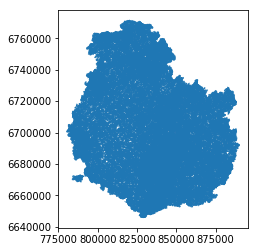

In [11]:
# we can plot all the Roads network of cote d'Or
data.plot()

Data type - geographical projection of he data used.

In [4]:
data.crs

{'init': 'epsg:2154'}

## Houses

In [3]:
# Load all the data from the BUILDINGS caegory
fp_bati = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/E_BATI/BATI_INDIFFERENCIE.shp"
fp_inds = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/E_BATI/BATI_INDUSTRIEL.shp"
fp_remk = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/E_BATI/BATI_REMARQUABLE.shp"
fp_ligh = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/E_BATI/CONSTRUCTION_LEGERE.shp"
# Read file using gpd.read_file()
buildings1= gpd.read_file(fp_bati)
buildings2 =gpd.read_file(fp_inds)
buildings3 = gpd.read_file(fp_remk)
buildings4 = gpd.read_file(fp_ligh)
frames = [buildings1, buildings2, buildings3, buildings4]
# concaenate the buildings into a single table
all_buildings =  pd.concat([buildings1, buildings2, buildings3, buildings4],ignore_index=True )

## WATER 

In [ ]:
fp_water = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/TERRAIN_SPORT.shp"
data_water = gpd.read_file(fp_water)
data_water.plot()

## SPORT TERRITORIES

In [ ]:
fp_sport = "D:/allegoria/datasets_alegoria/BD/BD_topo/cotedor/BDTOPO_2-2_TOUSTHEMES_SHP_LAMB93_D021_2018-09-25/BDTOPO/1_DONNEES_LIVRAISON_2018-11-00144/BDT_2-2_SHP_LAMB93_D021-ED182/E_BATI/TERRAIN_SPORT.shp"
data_sport = gpd.read_file(fp_sport)
data_sport.plot()

## BOUNDING BOXES FROM THE IMAGES

Finally, load the bounding boxes from all the jp2 images I have for a department

In [85]:
bb_boxes_path = 'D:/allegoria/datasets_alegoria/BD/BD_ortho/cotedor/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D021_2017-01-01/BDORTHO/3_SUPPLEMENTS_LIVRAISON_2018-01-00368/BDO_RVB_0M50_JP2-E080_LAMB93_D21-2017/dalles.shp'
bb_boxes= gpd.read_file(bb_boxes_path)

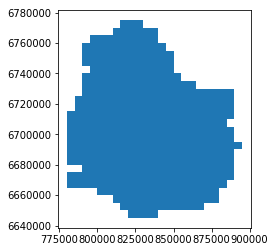

In [86]:
bb_boxes.plot()

In [ ]:
## Save the shape files as .png in correspondence with given images

./21-2017-0785-6720-LA93-0M50-E080.jp2


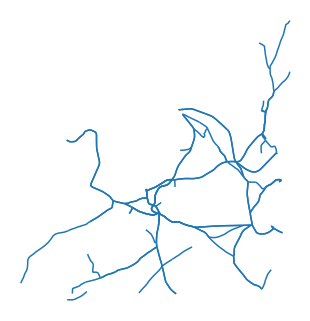

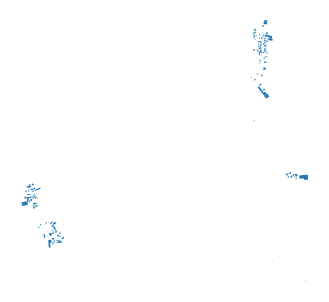

In [147]:
save_path = 'D:/allegoria/topo_ortho/cotedor/roads'
save_path2 = 'D:/allegoria/topo_ortho/cotedor/buildings'
save_path3 = 'D:/allegoria/topo_ortho/cotedor/water'
save_path4 = 'D:/allegoria/topo_ortho/cotedor/sport'
my_dpi=177
for i in range(10): # range - number of images
    bb_box = bb_boxes['geometry'].iat[i]
    
    #roads
    sg_roads = all_roads[all_roads.geometry.within(bb_box)] #extract segments of roads
    name = bb_boxes['NOM'].iat[i]
    print(name)
    name_wpath = save_path + name[1:-4] + '.png'
    fig  = sg_roads.plot(figsize=(1000/float(my_dpi), 1000/float(my_dpi)))
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(name_wpath, type="png", dpi= float(my_dpi) * 10)
    
    # buildings
    sg_houses = all_buildings[all_buildings.geometry.within(bb_box)] #extract segments of roads
    name_wpath = save_path2 + name[1:-4] + '.png'
    fig  = sg_houses.plot(figsize=(1000/float(my_dpi), 1000/float(my_dpi)))
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)
    
    # water
    sg_water = data_water[data_water.geometry.within(bb_box)] #extract segments of roads
    name_wpath = save_path3 + name[1:-4] + '.png'
    fig  = sg_water.plot(figsize=(1000/float(my_dpi), 1000/float(my_dpi)))
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)
    
    #sport 
    sg_sport = data_sport[data_sport.geometry.within(bb_box)] #extract segments of roads
    name_wpath = save_path4 + name[1:-4] + '.png'
    fig  = sg_water.plot(figsize=(1000/float(my_dpi), 1000/float(my_dpi)))
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(name_wpath,type="png", dpi=float(my_dpi) * 10)
    
    
    

In [145]:
# small verification of the results
# https://pypi.org/project/GDAL/
im_path = "D:/allegoria/datasets_alegoria/BD/BD_ortho/cotedor/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D021_2017-01-01/BDORTHO/1_DONNEES_LIVRAISON_2018-01-00368/BDO_RVB_0M50_JP2-E080_LAMB93_D21-2017/21-2017-0780-6670-LA93-0M50-E080.jp2"
#image=scipy.misc.imread(im_path)

ModuleNotFoundError: No module named 'rasterio'

In [148]:
sg_houses.to_file("D:/allegoria/topo_ortho/21-2017-0785-6720-LA93-0M50-E080.shp")